**21BAI19**

**JASTI V R S S KARTHIKEYA**


**A) AI based digital document archive company wants to develop  a deep learning model to clean/remove the noise from the scanned documents. Design them a suitable model and summarize the hyper parameter used in your model.
Dataset Description: https://www.kaggle.com/competitions/denoising-dirty-documents/data**


---



**Description**

The aim is to build a model that denoises images. Autoencoders is a suitable model as it can denoise the unsupervised data. We have considered adam optimizer with a default learning rate 0.01 and along with the we used binary_crossentropy loss function and we have used metrics like accuracy. The model consists of two parts, a encoder and a decoder part. Encoder part maps the input data to a lower latent space.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import glob
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Activation,Dropout,UpSampling2D,Conv2D,MaxPool2D,BatchNormalization,Input

#Dataset creation and Data Handling

In [ ]:
!unzip '/content/train.zip' -d '/content'

Archive:  /content/train.zip
   creating: /content/train/
  inflating: /content/train/101.png  
  inflating: /content/train/102.png  
  inflating: /content/train/104.png  
  inflating: /content/train/105.png  
 extracting: /content/train/107.png  
 extracting: /content/train/108.png  
 extracting: /content/train/11.png   
  inflating: /content/train/110.png  
 extracting: /content/train/111.png  
  inflating: /content/train/113.png  
  inflating: /content/train/114.png  
 extracting: /content/train/116.png  
  inflating: /content/train/117.png  
 extracting: /content/train/119.png  
 extracting: /content/train/12.png   
 extracting: /content/train/120.png  
  inflating: /content/train/122.png  
 extracting: /content/train/123.png  
  inflating: /content/train/125.png  
  inflating: /content/train/126.png  
  inflating: /content/train/128.png  
  inflating: /content/train/129.png  
  inflating: /content/train/131.png  
 extracting: /content/train/132.png  
 extracting: /content/train/13

In [ ]:
!unzip '/content/test.zip' -d '/content/test'

Archive:  /content/test.zip
   creating: /content/test/test/
  inflating: /content/test/test/1.png  
 extracting: /content/test/test/10.png  
  inflating: /content/test/test/100.png  
 extracting: /content/test/test/103.png  
  inflating: /content/test/test/106.png  
 extracting: /content/test/test/109.png  
  inflating: /content/test/test/112.png  
 extracting: /content/test/test/115.png  
 extracting: /content/test/test/118.png  
  inflating: /content/test/test/121.png  
  inflating: /content/test/test/124.png  
  inflating: /content/test/test/127.png  
 extracting: /content/test/test/13.png  
  inflating: /content/test/test/130.png  
 extracting: /content/test/test/133.png  
  inflating: /content/test/test/136.png  
 extracting: /content/test/test/139.png  
 extracting: /content/test/test/142.png  
 extracting: /content/test/test/145.png  
  inflating: /content/test/test/148.png  
 extracting: /content/test/test/151.png  
  inflating: /content/test/test/154.png  
 extracting: /conte

In [ ]:
x_train = []
%cd /content/train/
png_files=glob.glob('*.png')
for file in png_files:
    image = Image.open(file)
    image = image.resize((540,420))
    image=image.convert("L")
    image= np.asarray(image,dtype='float32')/255.0
    image=np.reshape(image,(420,540,1))
    x_train.append(image)


/content/train


In [ ]:
x_train[0].shape

(420, 540, 1)

In [ ]:
y_train = []
%cd /content/train_cleaned/
png_files=glob.glob('*.png')
for file in png_files:
    image = Image.open(file)
    image = image.resize((540,420))
    image=image.convert("L")
    image= np.asarray(image,dtype='float32')/255.0
    image=np.reshape(image,(420,540,1))
    y_train.append(image)

/content/train_cleaned


In [ ]:
y_train[0].shape

(420, 540, 1)

In [ ]:
x_test = []
%cd /content/test/test/
png_files=glob.glob('*.png')
for file in png_files:
    image = Image.open(file)
    image = image.resize((540,420))
    image=image.convert("L")
    image= np.asarray(image,dtype='float32')/255.0
    image=np.reshape(image,(420,540,1))
    x_test.append(image)

/content/test/test


In [ ]:
x_test[0].shape

(420, 540, 1)

#Data preparation


In [ ]:
y_train=np.asarray(y_train)
x_train=np.asarray(x_train)
x_test=np.asarray(x_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(144, 420, 540, 1)
(144, 420, 540, 1)
(72, 420, 540, 1)


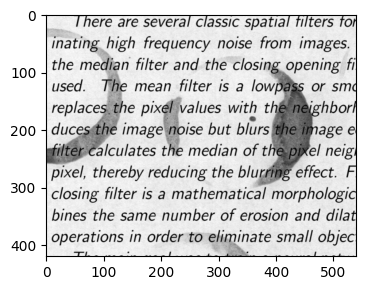

In [ ]:
plt.figure(figsize=(4,4))
plt.imshow(x_train[0],cmap='gray')

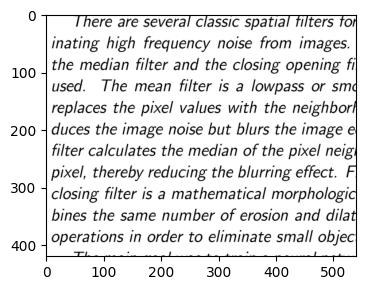

In [ ]:
plt.figure(figsize=(4,4))
plt.imshow(y_train[0],cmap='gray')

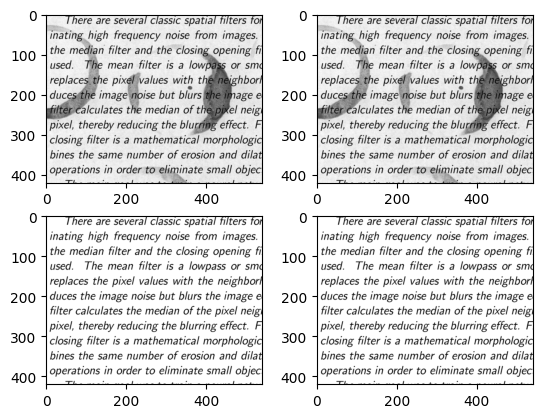

In [ ]:
for i in range(2):
  plt.subplot(2,2,i+1)
  plt.imshow(x_train[0],cmap='gray')
  plt.subplot(2,2,2+i+1)
  plt.imshow(y_train[0],cmap='gray')

#Model Building

*   Autoencoder model for Denoising



In [ ]:
input_img=Input(shape=(420,540,1))
x=Conv2D(64,(3,3),padding='same',activation='relu')(input_img)
x=BatchNormalization()(x)
x=MaxPool2D((2,2), padding='same')(x)
encoded=Dropout(0.5)(x)

x=Conv2D(64,(3,3),padding='same')(encoded)
x=BatchNormalization()(x)
x=UpSampling2D((2,2))(x)
Decoded=Conv2D(1,(3,3),padding='same',activation='sigmoid')(x)

In [ ]:
model=Model(input_img,Decoded)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 420, 540, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 420, 540, 64)      640       
                                                                 
 batch_normalization (Batch  (None, 420, 540, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 210, 270, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 210, 270, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 210, 270, 64)      36928 

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=2,batch_size=32,shuffle=True)

Epoch 1/2
5/5 [==============================] - 207s 38s/step - loss: 0.6586 - accuracy: 0.5903
Epoch 2/2
5/5 [==============================] - 205s 40s/step - loss: 0.5626 - accuracy: 0.6458


In [ ]:
y_pred=model.predict(x_test)

3/3 [==============================] - 23s 6s/step


In [ ]:
print("Training metrics")
loss,accuracy= model.evaluate(x_train,y_train,verbose=2)

Training metrics
5/5 - 51s - loss: 0.6135 - accuracy: 0.7056 - 51s/epoch - 10s/step


In [ ]:
print("Test metrics")
loss,accuracy= model.evaluate(x_test,y_pred,verbose=2)

Test metrics
3/3 - 23s - loss: 0.6891 - accuracy: 0.5036 - 23s/epoch - 8s/step
